# Topic modeling
### with Latent Dirichlet Allocation

In [1]:
from IPython.display import Image


## Brief theoretial introduction

In statistics and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents - > unsupervized learning -- clusterization.

Common techniques: Latent Semantic Analysis (LSA/LSI), Probabilistic Latent Semantic Analysis (pLSA), and Latent Dirichlet Allocation (LDA)

#### LDA

LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities

LDAmodel training is a finding following distributions:

$\psi$ -- the distribution of words for each topic

$\phi$ -- -//- topics for each document


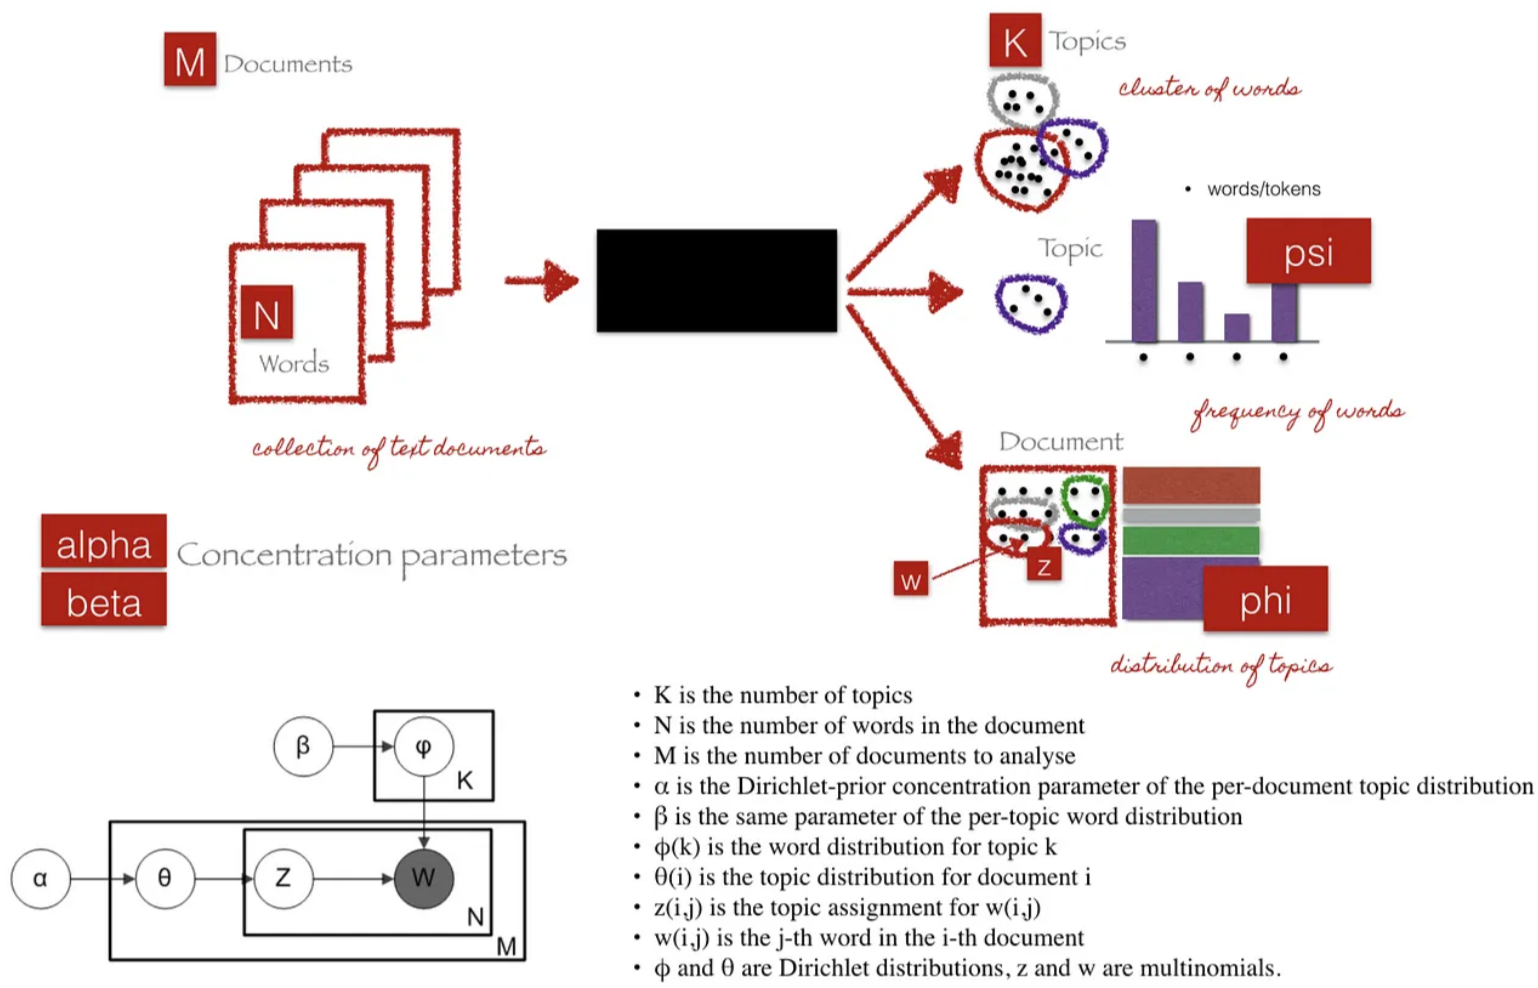

In [2]:
Image(filename='1.png')

#### Text representing

Space: $\{ topic_i:weight(topic_i, T)\}$

Text is a mixture of different topics, so we're about words clustering rather than text clustering

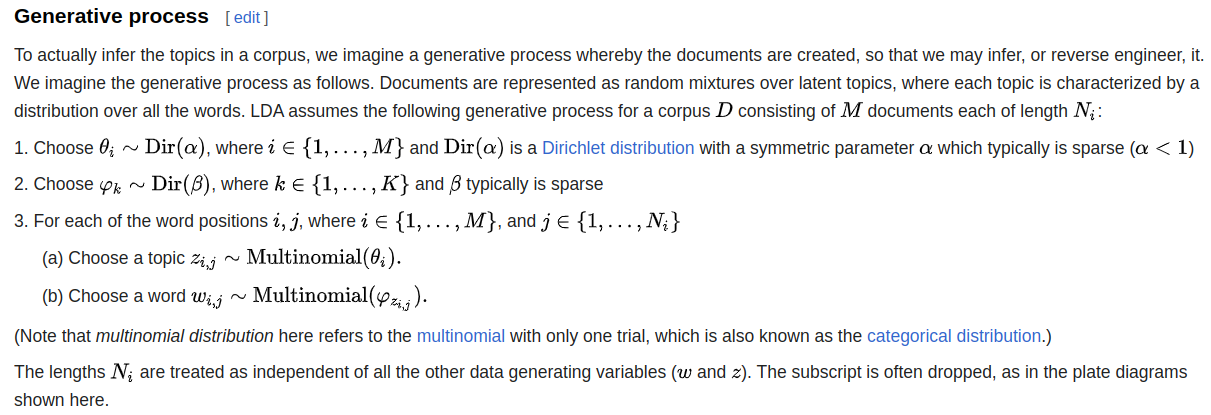

In [3]:
Image(filename='2.png')

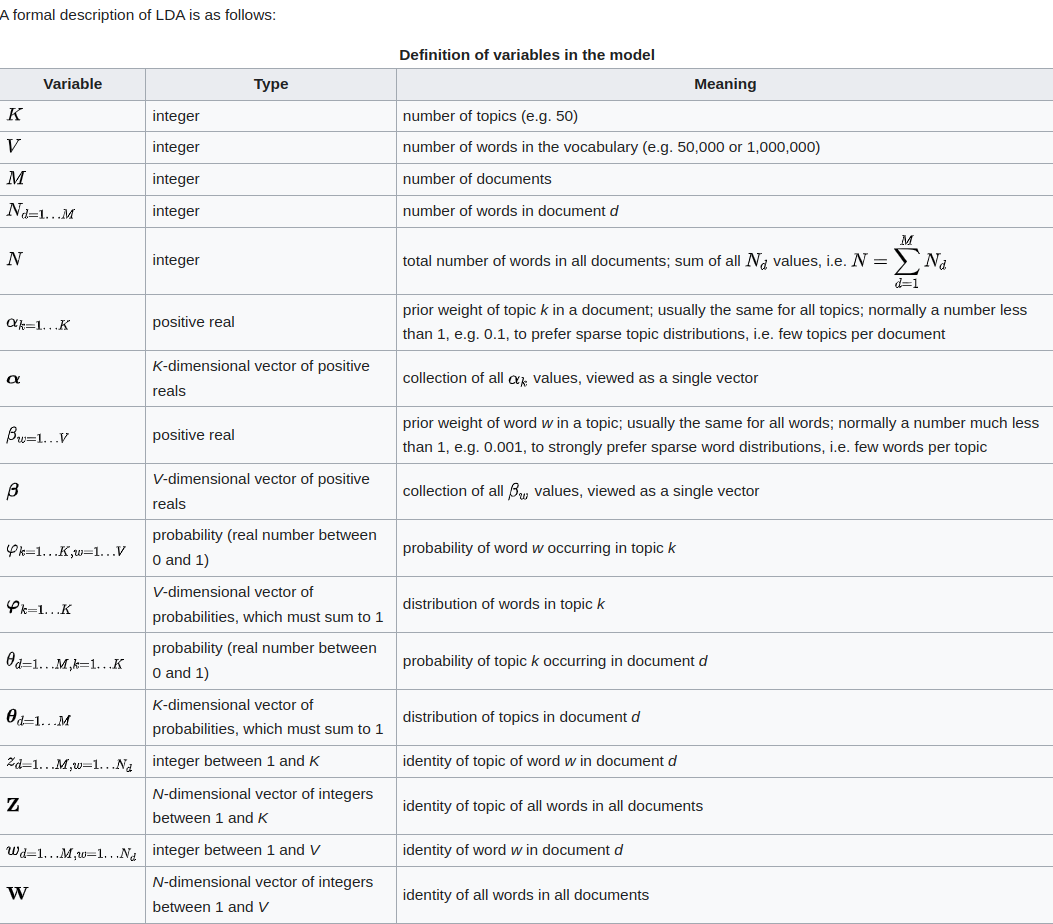

In [4]:
Image(filename='3.png')

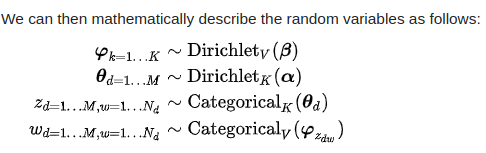

In [5]:
Image(filename='4.png')

I took this dataset
https://www.kaggle.com/datasets/benhamner/nips-papers

In [6]:
import pandas as pd
import re


from wordcloud import WordCloud

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os

from pprint import pprint

[nltk_data] Downloading package stopwords to /home/ivan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
papers = pd.read_csv("NIPS Papers/papers.csv")
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


Data processing:
* removing unnecessary columns
* cleaning data from punctuation, string-terminal symbols and other obvious waste
* words lowercasing
* lemmatization (to be done)

In [8]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(512)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
2588,2007,Computing Robust Counter-Strategies,Adaptation to other initially unknown agents o...,Computing Robust Counter-Strategies\n\nMichael...
5174,2015,M-Statistic for Kernel Change-Point Detection,Detecting the emergence of an abrupt change-po...,M -Statistic for Kernel Change-Point Detection...
6549,1994,Convergence Properties of the K-Means Algorithms,Abstract Missing,Convergence Properties of the K-Means\nAlgorit...
2080,1989,Using Local Models to Control Movement,Abstract Missing,316\n\nAtkeson\n\nUsing Local Models to Contro...
3986,2012,A systematic approach to extracting semantic i...,This paper introduces a novel classification m...,A systematic approach to extracting semantic\n...


In [9]:
data = papers['paper_text'].values.tolist()

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

#Remove single letter words
data = [re.sub(r'\b\w\b', '', sent) for sent in data]

<>:4: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \S
/tmp/ipykernel_816359/68588412.py:4: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]
/tmp/ipykernel_816359/68588412.py:7: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]


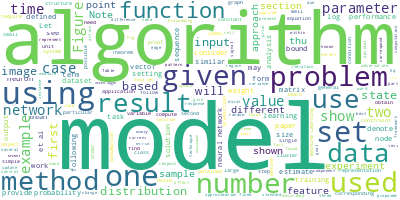

In [10]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(','.join(data))

# Visualize the word cloud
wordcloud.to_image()

In [11]:
#stop words removing

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['computing', 'robust', 'counter', 'strategies', 'michael', 'johanson', 'martin', 'zinkevich', 'michael', 'bowling', 'computing', 'science', 'department', 'university', 'alberta', 'edmonton', 'ab', 'canada', 'abstract', 'adaptation', 'initially', 'unknown', 'agents', 'often', 'requires', 'computing', 'effective', 'counter', 'strategy', 'bayesian']


In [12]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 8), (1, 1), (2, 2), (3, 2), (4, 12), (5, 17), (6, 1), (7, 1), (8, 3), (9, 3), (10, 1), (11, 9), (12, 7), (13, 1), (14, 2), (15, 2), (16, 3), (17, 4), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 5), (29, 14)]


In [17]:
# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaModel(
    corpus=corpus,                                     
    id2word=id2word,
    alpha=0.25,
    eta=0.15,
    num_topics=num_topics)

# Print the Keyword in the num_topics topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"algorithm" + 0.005*"model" + 0.005*"learning" + 0.004*"function" + '
  '0.004*"set" + 0.004*"number" + 0.004*"one" + 0.004*"two" + 0.004*"data" + '
  '0.003*"given"'),
 (1,
  '0.007*"data" + 0.007*"learning" + 0.006*"model" + 0.005*"algorithm" + '
  '0.005*"set" + 0.004*"function" + 0.004*"using" + 0.004*"one" + 0.004*"time" '
  '+ 0.003*"two"'),
 (2,
  '0.008*"model" + 0.006*"data" + 0.004*"learning" + 0.004*"algorithm" + '
  '0.004*"set" + 0.004*"using" + 0.004*"time" + 0.004*"network" + 0.004*"one" '
  '+ 0.004*"number"'),
 (3,
  '0.006*"model" + 0.006*"algorithm" + 0.005*"using" + 0.005*"learning" + '
  '0.004*"time" + 0.004*"data" + 0.004*"function" + 0.004*"number" + '
  '0.004*"given" + 0.004*"input"'),
 (4,
  '0.008*"learning" + 0.005*"data" + 0.005*"set" + 0.005*"function" + '
  '0.005*"model" + 0.004*"algorithm" + 0.004*"problem" + 0.004*"one" + '
  '0.004*"using" + 0.004*"training"')]


### Some words about metrics

#### homogeinity
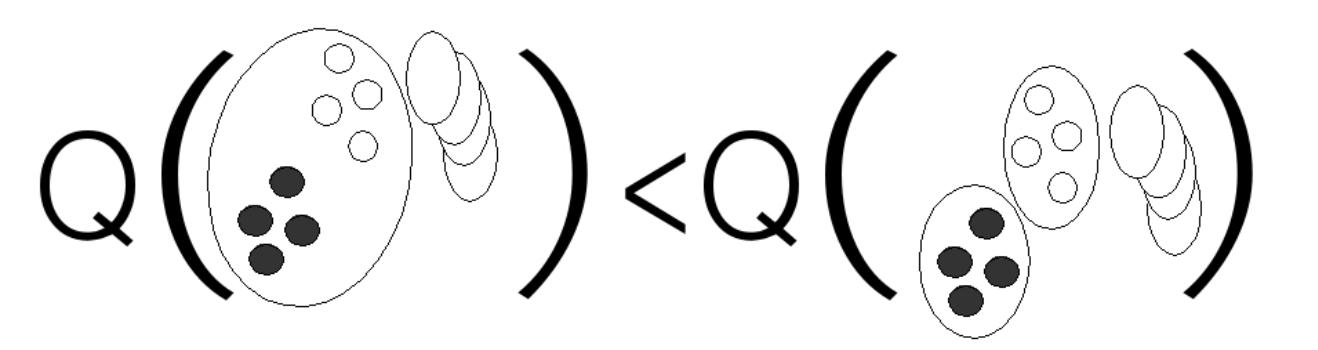

#### completeness
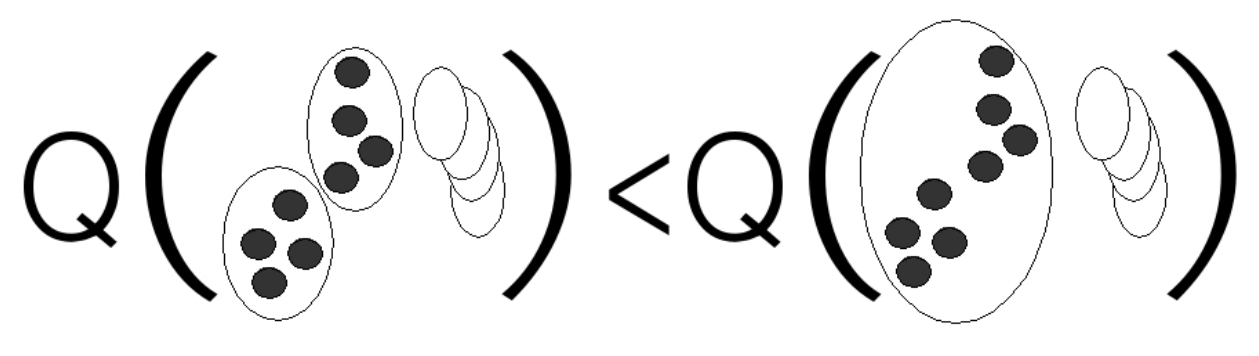

#### Rag Bag
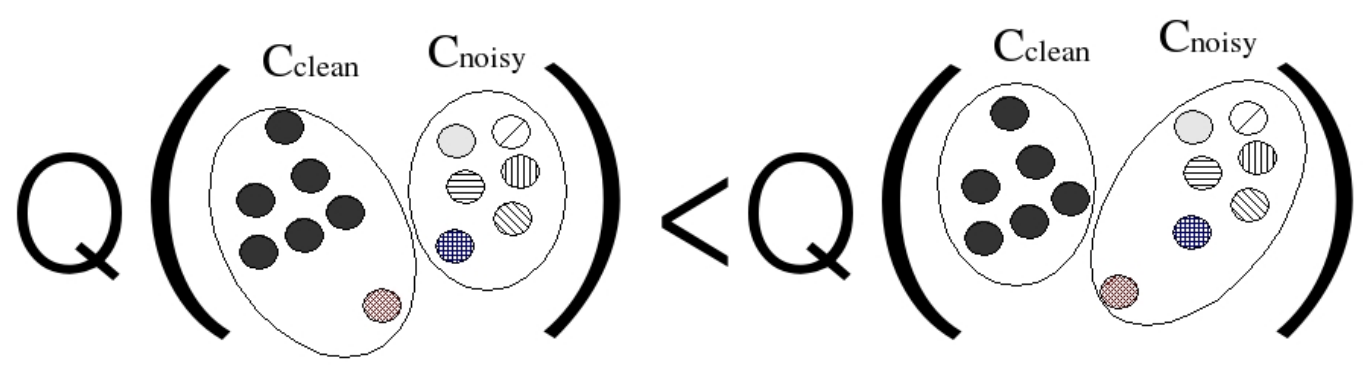

#### Size vs Quantity
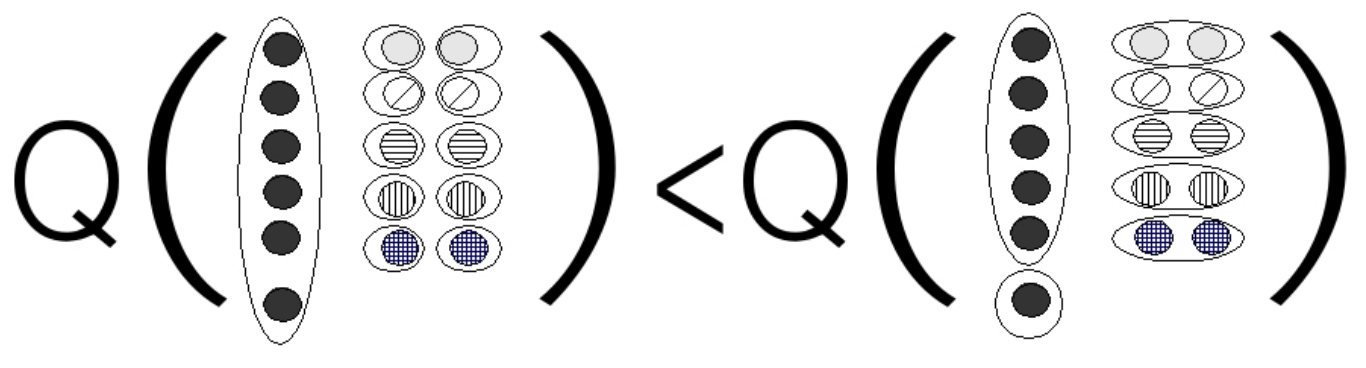

In [18]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/home/ivan/miniconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.007613  0.002120       1        1  29.423910
1      0.002014  0.003720       2        1  22.622396
0      0.000760 -0.006812       3        1  19.303813
3     -0.003309 -0.003067       4        1  14.624798
2     -0.007079  0.004040       5        1  14.025083, topic_info=           Term         Freq        Total Category  logprob  loglift
477       model  6847.000000  6847.000000  Default  30.0000  30.0000
772        time  3868.000000  3868.000000  Default  29.0000  29.0000
2080      input  2533.000000  2533.000000  Default  28.0000  28.0000
809       using  4738.000000  4738.000000  Default  27.0000  27.0000
508      number  3757.000000  3757.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
645     results   385.395735  3123.735550   Topic5  -6.0598  -0.1282
791         two   415.091996  3715.499370   Topic5  -5.9856  -0.2274
783    training   382.435870  3170.871320   Topic5  -6.0675  -0.1509
341       given   393.110121  3392.524910   Topic5  -6.0400  -0.1909
223   different   331.780085  2440.946064   Topic5  -6.2096  -0.0313

[489 rows x 6 columns], token_table=       Topic      Freq Term
term                       
23395      1  0.234230  ado
23395      2  0.140538  ado
23395      3  0.093692  ado
23395      4  0.187384  ado
23395      5  0.374768  ado
...      ...       ...  ...
1558       5  0.154579   zb
845        1  0.220499  zbb
845        2  0.220499  zbb
845        3  0.220499  zbb
845        5  0.440998  zbb

[1533 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 4, 3])

In [15]:
lda_model.alpha

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
      dtype=float32)

In [16]:
lda_model.eta

array([0.15, 0.15, 0.15, ..., 0.15, 0.15, 0.15], dtype=float32)